In [44]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import os
from datetime import datetime, timedelta
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams["axes.unicode_minus"] = False

In [57]:
DATA_ROOT = '~/projects/factormaster'
# START_DATE = pd.to_datetime('2014-02-28')
START_DATE = pd.to_datetime('2020-01-01')
END_DATE = pd.to_datetime('2020-10-31')

In [49]:
def display_indices(index_names = None):
    if not isinstance(index_names, list):
        index_names = [index_names]
    df_list = []
    # CSI300
    df = pd.read_excel(os.path.join(DATA_ROOT, 'data/features/AShareIndex.xlsx'), index_col=0, parse_dates=True)[['H00300.CSI']]
    df = df.loc[START_DATE: END_DATE]
    df = df / df.iloc[0]
    df_list.append(df)
    # aqumon1000
    for index in index_names:
        if index is None:
            name = 'aqumon1000'
            
        else:
            name = f'aqumon1000_{index.lower()}'
        df = pd.read_csv(os.path.join(DATA_ROOT, f'data/indices/{name}.csv'), index_col=0, parse_dates=True)
        df = df.loc[START_DATE: END_DATE]
        df = df / df.iloc[0]
        df_list.append(df)

    final_df = pd.concat(df_list, axis=1)
    final_df.plot()
    plt.show()
    
    excess_df = final_df[[i for i in final_df.columns if i != 'H00300.CSI']]
    excess_df = excess_df - final_df[['H00300.CSI']].values
    excess_df.plot()
    plt.show()

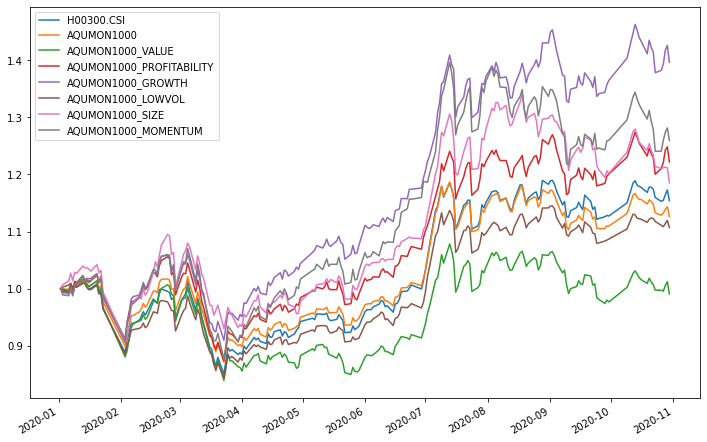

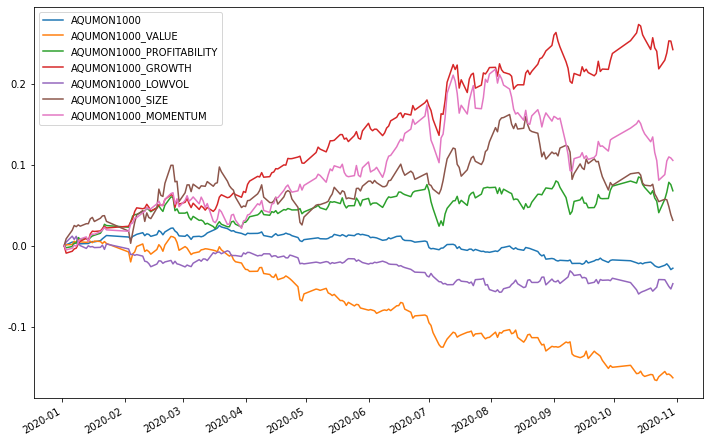

In [58]:
display_indices([None, 'Value', 'Profitability', 'Growth', 'LowVol', 'Size', 'Momentum'])

In [51]:
df = pd.read_csv(os.path.join(DATA_ROOT, 'data/indices/aqumon1000_growth.csv'), index_col=0, parse_dates=True)

In [52]:
rtn_df = df.pct_change()

In [53]:
rtn_df.mean()/rtn_df.std() * np.sqrt(252)

AQUMON1000_GROWTH    0.683516
dtype: float64

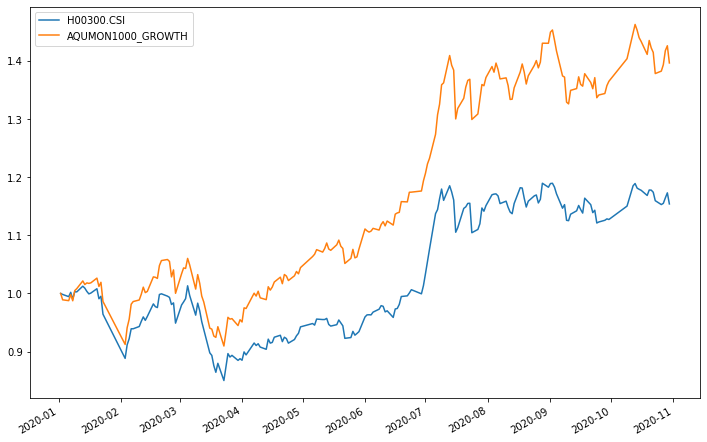

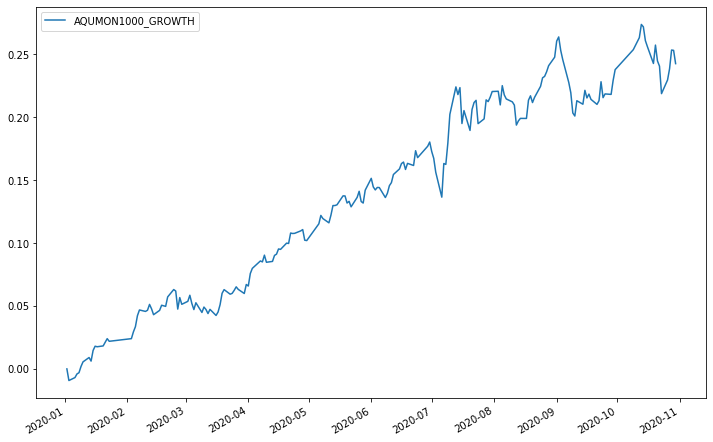

In [54]:
display_indices(['Growth'])